In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astropy.convolution import convolve, convolve_fft

In [3]:
from properimage.tests import simtools as st

In [4]:
delta = np.zeros((32,32))
delta[21, 7] = 1
delta[13, 24] = 1

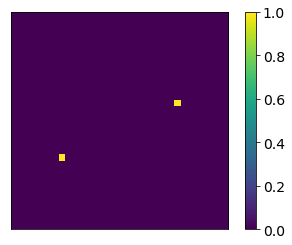

In [5]:
plt.imshow(delta)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
cbar =plt.colorbar()
cbar.ax.tick_params(labelsize=14)

In [6]:
psf = st.Psf(N=16, X_FWHM=5)

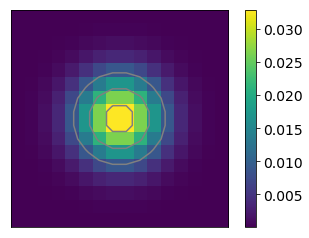

In [7]:
plt.imshow(psf)
cbar = plt.colorbar()
plt.contour(psf, 3, colors='gray')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
cbar.ax.tick_params(labelsize=14)

In [8]:
c = convolve_fft(array=delta, kernel=psf)

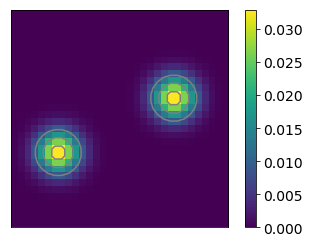

In [9]:
plt.imshow(c)
cbar = plt.colorbar()
plt.contour(c, [0.01, 0.02, 0.03], colors='gray')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
cbar.ax.tick_params(labelsize=14)

In [10]:
delta = np.zeros((64,64))
for i in range(10):
    x, y = np.random.randint(4, size=2, high=60)
    delta[x, y] = 100*np.random.random()
psf_ref = st.Psf(N=16, X_FWHM=0.7)
Ref = convolve_fft(array=delta, kernel=psf)

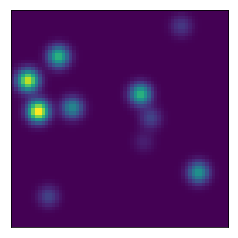

In [11]:
plt.imshow(Ref)
#cbar = plt.colorbar()
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
#cbar.ax.tick_params(labelsize=14)

In [12]:
kernel = st.Psf(N=16, X_FWHM=3.5)
New = convolve_fft(Ref, kernel=kernel)

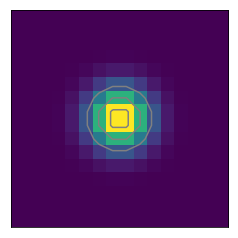

In [13]:
plt.imshow(kernel)
#cbar = plt.colorbar()
plt.contour(kernel, 3, colors='gray')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
#cbar.ax.tick_params(labelsize=14)

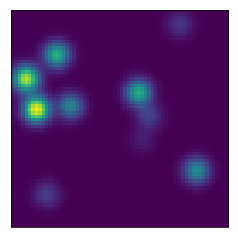

In [14]:
plt.imshow(New)
#cbar = plt.colorbar()
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
#cbar.ax.tick_params(labelsize=14)

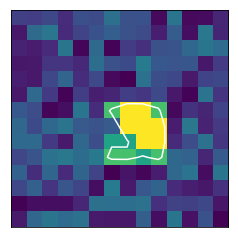

In [15]:
k =np.random.random((14, 14))
k[7,7]=k[7,8]=k[6,7]=k[7,9]=k[6,8]=k[8,9]=k[8,8]=2.4

k[6,9]=k[6,6]=k[9,9]=k[9,8]=k[6,9]=k[6,6]=k[9,9]=k[9,8]=k[9,6]=k[9,7]=k[9,8]=1.7
k[8,6]=k[8,7]=k[9,8]=1.4

plt.imshow(k)
plt.contour(k, 1, colors='w')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

In [16]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

In [17]:
xi, xf = 600, 900
yi, yf = 300, 700
n = fits.getdata('/home/bruno/Data/NewRBpipeline/images/img00101/new.fits')[xi:xf, yi:yf]
r = fits.getdata('/home/bruno/Data/NewRBpipeline/images/img00101/ref.fits')[xi:xf, yi:yf]
d = fits.getdata('/home/bruno/Data/NewRBpipeline/images/img00101/diff.fits')[xi:xf, yi:yf]
s = fits.getdata('/home/bruno/Data/NewRBpipeline/images/img00101/s_diff.fits')[xi:xf, yi:yf]
p = fits.getdata('/home/bruno/Data/NewRBpipeline/images/img00101/psf_d.fits')[:26, :26]

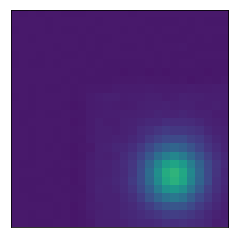

In [18]:
mean, med, std = sigma_clipped_stats(p)
plt.imshow(p, vmin=mean-6*std, vmax=mean+76*std, interpolation='none')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

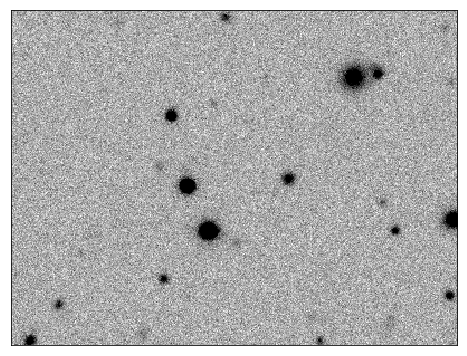

In [19]:
mean, med, std = sigma_clipped_stats(np.log10(n))
plt.figure(figsize=(8,8))
plt.imshow(np.log10(n), vmin=mean-3*std, vmax=mean+6*std, interpolation='none', origin='lower', cmap='gray_r')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.savefig('/home/bruno/Documents/Doctorado/Presentaciones/presentaciones/seminario1/imgs/diff/new.png', dpi=480)

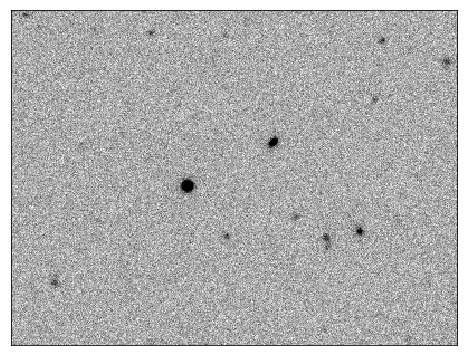

In [20]:
mean, med, std = sigma_clipped_stats(np.log10(r))
plt.figure(figsize=(8,8))
plt.imshow(np.log10(r), vmin=mean-3*std, vmax=mean+6*std, interpolation='none', origin='lower', cmap='gray_r')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.savefig('/home/bruno/Documents/Doctorado/Presentaciones/presentaciones/seminario1/imgs/diff/ref.png', dpi=480)

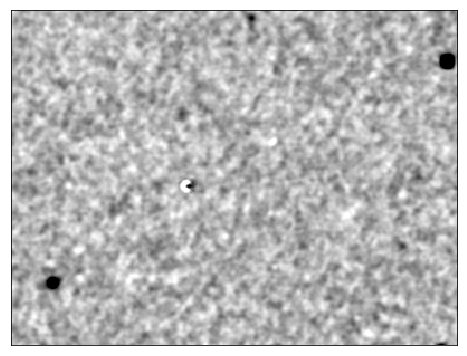

In [21]:
mean, med, std = sigma_clipped_stats(s)
plt.figure(figsize=(8,8))
plt.imshow(s, vmin=mean-3*std, vmax=mean+7*std, interpolation='none', origin='lower', cmap='gray_r')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.savefig('/home/bruno/Documents/Doctorado/Presentaciones/presentaciones/seminario1/imgs/diff/s.png', dpi=480)

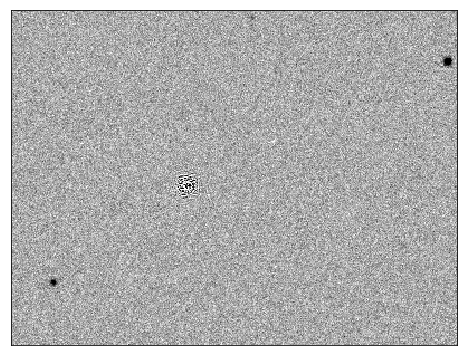

In [22]:
mean, med, std = sigma_clipped_stats(d)
plt.figure(figsize=(8,8))
plt.imshow(d, vmin=mean-3*std, vmax=mean+6*std, interpolation='none', origin='lower', cmap='gray_r')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.savefig('/home/bruno/Documents/Doctorado/Presentaciones/presentaciones/seminario1/imgs/diff/diff.png', dpi=480)